In [1]:
!pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▌        | 834.1MB 1.5MB/s eta 0:03:28tcmalloc: large alloc 1147494400 bytes == 0x55942abbe000 @  0x7f0b87ae8615 0x5593f1cf106c 0x5593f1dd0eba 0x5593f1cf3e8d 0x5593f1de599d 0x5593f1d67fe9 0x5593f1d62b0e 0x5593f1cf577a 0x5593f1d67e50 0x5593f1d62b0e 0x5593f1cf577a 0x5593f1d6486a 0x5593f1de67c6 0x5593f1d63ee2 0x5593f1de67c6 0x5593f1d63ee2 0x5593f1de67c6 0x5593f1d63ee2 0x5593f1de67c6 0x5593f1e68431 0x5593f1dc9049 0x5593f1d33c84 0x5593f1cf48e9 0x5593f1d68ade 0x5593f1cf569a 0x5593f1d63a45 0x5593f1d62e0d 0x5593f1cf577a 0x5593f1d63a45 0x5593f1cf569a 0x5593f1d63a45
     |█████████████████████████████▊  | 1055.7MB 1.3MB/s eta 0:01:05tcmalloc: large alloc 1434370048 bytes == 0x55946f214000 @  0x7f0b87ae8615 0x5593f1cf106c 0x5593f1dd0eba 0x5593f1cf3e8d 0x5593f1de599d 0x5593f1d67fe9 0x5593f1d62b0e 0x5593f1cf577a 0x5593f1d67e50 0x5593f1d62b0e 0x5593f1cf577a 0x5593f1d6486a 0x5593f1de67c6 0x5593f1d63ee2 0

In [2]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 10.3MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=cbe20ea2dda6255579a74d415aef75fda310d5126e83f85ca53f439973333c47
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.7.0+cu110 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
print(torch.__version__, torch.cuda.is_available())

1.7.0+cu110 True


In [4]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 41.0MB/s 
     |████████████████████████████████| 2.2MB 11.0MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=dcf385d4993bd8e746b67c3c0f09cf31ef0b239c71a66be0139ad9d2e68d68fc
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
  Created wheel for iopath: filename=iopath-0.1.6-cp37-none-any.whl size=18269 sha256=e446af88b696ff40755acfb58bae708ce76a15648757a3e65b9818a34ad660ce
  Stored in directory: /root/.cache/pip/wheels/ff/87/55/7513122394822977f993e1798bfebb46730d6183df8db7b283
Successfully built fvcore iopath
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
import random
from detectron2.data import DatasetCatalog, MetadataCatalog

In [3]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

In [4]:
from detectron2.utils.visualizer import ColorMode

In [5]:
# get image
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
#im = cv2.imread("./input.jpg")
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ACL_segmentation/ACL_segmentation_data/test/145.jpg")


In [6]:
# Create config
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/Colab Notebooks/ACL_segmentation/Detectron2/output/config.yml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/Colab Notebooks/ACL_segmentation/Detectron2/output/model_0004999.pth"



In [7]:
# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

AttributeError: ignored

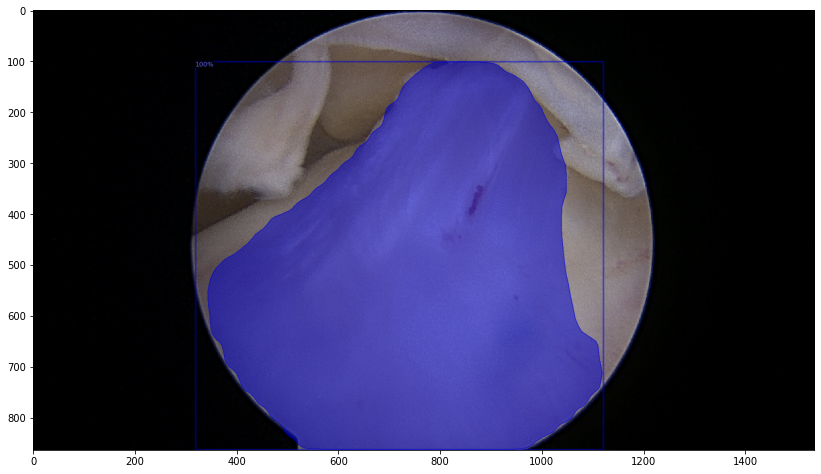

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#cv2.imshow(v.get_image()[:, :, ::-1])
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ACL_segmentation/ACL_segmentation_data/test/145.jpg")
# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#cv2.imshow(v.get_image()[:, :, ::-1])
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()